In [1]:
# 训练数据分项依次为：年，月，日，性别（1男，0女），是否购物（1购，0不购）
train_data = [ [2020, 11, 1, 1, 1],
               [2020, 11, 1, 0, 1],
               [2020, 11, 1, 0, 1],
               [2020, 11, 1, -1, 1],
               [2020, 11, 1, 1, 1],
               [2020, 11, 1, 0, 1],
               [2020, 11, 1, 0, 0],
               [2020, 11, 1, 0, 1],
               [2020, 11, 2, 1, 0],
               [2020, 11, 2, 1, 1],
               [2020, 11, 2, 0, 0],
               [2020, 11, 2, 1, 1],
               [2020, 11, 3, 0, 0],
               [2020, 11, 3, 0, 0],
               [2020, 11, 4, 1, 0],
               [2020, 11, 4, 0, 1],
               [2020, 11, 5, 0, 0],
               [2020, 11, 5, 0, 0],
               [2020, 11, 6, 1, 1],
               [2020, 11, 6, 1, 1],
               [2020, 11, 7, 0, 0],
               [2020, 11, 7, 1, 0],
               [2020, 11, 7, 0, 1],
               [2020, 11, 7, 0, 1],
               [2020, 11, 8, 1, 1],
               [2020, 11, 8, 0, 1],
               [2020, 11, 9, 0, 0],
               [2020, 11, 9, 0, 0],
               [2020, 11, 10, 1, 1],
               [2020, 11, 11, 1, 0],
               [2020, 11, 11, 1, -1],
               [2020, 11, 12, 0, 0]]
# 清除不合格数据
del train_data[30]
del train_data[3]
len(train_data)

30

In [2]:
import datetime # 导入datetime模块，该模块用来处理与日期和时间有关的计算
# 定义一个判断是否为周末的函数
def isweekend( date ): 
    theday = datetime.date( date[0], date[1], date[2] ) # 创建一个date对象
    if theday.isoweekday() in { 6, 7 }: # 如果date是周末则返回1，否则返回0
        return 1
    else:
        return 0

In [3]:
# 是否周末的特征，性别，是否购物三项数据
train_set1 = []
for i in range(len(train_data)):
        weekend = isweekend(train_data[i][:3])
        train_set1.append( [weekend, train_data[i][3], train_data[i][4]] )

In [4]:
import pandas as pd
df = pd.core.frame.DataFrame(train_set1)
#print(df)

In [5]:
wk = df[0].astype('str').apply(lambda x: '周末' if x=='1' else '非周末')
man = df[1].astype('str').apply(lambda x: '男' if x=='1' else '女')
label = df[2].astype('str').apply(lambda x: '购物' if x=='1' else '不购物')
#print(label)

In [6]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=13)

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('男', '购物'),
               (0.0, 0.0, 0.39603960396039606, 0.6622516556291389)),
              (('男', '不购物'),
               (0.0,
                0.6688741721854303,
                0.39603960396039606,
                0.3311258278145695)),
              (('女', '购物'),
               (0.40594059405940597,
                0.0,
                0.594059405940594,
                0.44150110375275936)),
              (('女', '不购物'),
               (0.40594059405940597,
                0.4481236203090508,
                0.594059405940594,
                0.5518763796909493))]))

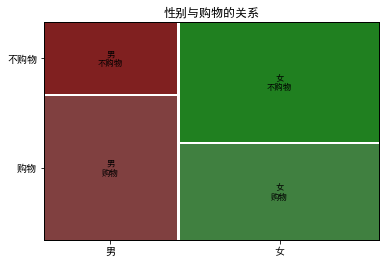

In [7]:
mosaic_data1 = pd.concat([man, label], axis=1)
#print(mosaic_data)
mosaic(data=mosaic_data1, index=[1, 2], gap=0.01, title=u'性别与购物的关系')

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('周末', '购物'),
               (0.0, 0.0, 0.4290429042904291, 0.7641365257259296)),
              (('周末', '不购物'),
               (0.0,
                0.770759042282221,
                0.4290429042904291,
                0.22924095771777883)),
              (('非周末', '购物'),
               (0.438943894389439,
                0.0,
                0.5610561056105611,
                0.35060381768601484)),
              (('非周末', '不购物'),
               (0.438943894389439,
                0.3572263342423062,
                0.5610561056105611,
                0.6427736657576938))]))

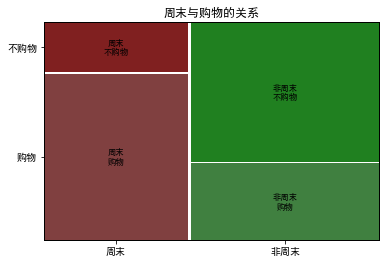

In [8]:
mosaic_data = pd.concat([wk, label], axis=1)
mosaic(data=mosaic_data, index=[0, 2], gap=0.01, title=u'周末与购物的关系')